<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Open AI Gym Basics

Let's explore the basics of a **gym** environment, later on we wil interact with it and create agents to learn from it.

In this notebook we will get to know the open ai gym library and its environments:

https://gym.openai.com/

It contains various implementations of tasks on which you can try Reinforcement Learning agents. 

At first we will import the necessary environments

### Installation NOTE:
https://stackoverflow.com/questions/69442971/error-in-importing-environment-openai-gym

`pip install gym[atari,accept-rom-license]==0.21.0`

`pip install pygame`

In [4]:
import gym
import ale_py

In [2]:
print('gym:', gym.__version__)
print('ale_py:', ale_py.__version__)

gym: 0.21.0
ale_py: 0.7.5


--------

### Import stuffs

In [1]:
import gym
import ale_py

import time # to slow done the game rendering to human speed
import matplotlib.pyplot as plt

%matplotlib inline

Now we can go and chose an environment we want to try and where we want to train an agent on from here:<br />
https://gym.openai.com/envs/

Let's say we want to play the **breakout game** https://gym.openai.com/envs/Breakout-v0/, then we need to perform the following two steps:

1. Define the name of the environment
2. Create the environment

### Create Environment

In [10]:
env_name = 'ALE/Breakout-v5' # Use the exact same name as stated on gym.openai
env = gym.make(env_name) # use gym.make to create your environment

Thats all! You successfully created the environment!<br />
Those steps are identical for all environments.

If you want to take a look at your game, gym comes with a handy utils function called **play** for Atari games.<br />
Note that you start the game with *space* and move with *a* and *d*

How many points can you score?

### Interacting with Game Manually

In [3]:
from gym.utils import play    # import the play module

pygame 2.1.2 (SDL 2.0.18, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
play.play(env, zoom=2)     # call the play function

# now the game will launch
# controls : AWSE , space => start the ball

Now after getting to know how we can select an environment and interact with it, it is time to dive deeper into the world of gym.

Gym offers us many functions to interact with the created environment. The most important are:

* reset() - which resets the state of the environment to the initial state. I.e it restarts the game 
* step(action) - performs an action on your environment. In our case it either starts the game or moves to the left, right, or just remains at the current position. It returns the current state of the environment, the reward, if the game is done and some debugging information
* render(mode) - Renders your environment and displays it on your monitor

We will get to know those functions in the next few cells

First we will take a look at the **render** function:<br />
render(mode) takes one argument, namely the render *mode*. *mode* can take two possible values:
* "human"
* "rgb_array"

"human" directly displays the game on your screen, while "rgb_array" returns the array containing the state of the current environment aka the image render shows us.

In [4]:
# for step in range(100):
#     env.render()

### Render in RGB mode

In [5]:
array = env.render(mode='rgb_array') # returns the image as a 2d numpy array

In [6]:
type(array)

numpy.ndarray

In [7]:
array.shape

(210, 160, 3)

In [8]:
print(array[60][50])  # display the colour of some pixel (row 60 and column 50 - so the red blocks)

[200  72  72]


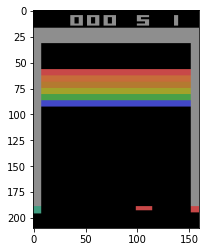

In [9]:
%matplotlib inline
plt.imshow(array); # you can use matplotlib to take a look at your environment - it is the same image as above

Note that even we ran 1000 steps over the environment, nothing happened! <br />
This is because no action was taken on this environment.

This is the point where the **step** function joins our game. It performs a selected action on our environment, e.g moving to the left.

You can take a look at the possible actions via the **action_space.n** property.
It returns 4 for our game which is in line with our above findings that we can either start the game, move left or right, or stand still.

### Action Space 

In [10]:
type(env)

gym.wrappers.time_limit.TimeLimit

In [11]:
env.action_space

Discrete(4)

In [12]:
env.action_space.n

4

In [13]:
print(f"There are {env.action_space.n} possible actions")

There are 4 possible actions


Now it is time to watch some action happening. For this we can select a random possible action.
We could do this by using **numpy.random.randint(0, 4)** or by using the provided sample function **env.action_space.sample()** which directly returns you a possible action.

Note how the "ale.lives" info reduces for each live you lose

In [18]:
env.reset()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [19]:
for _ in range(200):
    # display the current state
#     env.render()  # display the current state
    
    # get the random action 
    random_action = env.action_space.sample()
    
    # perform the action in current state of the environment.
    # it turns 4 types of values as below
    observation, reward, done, info = env.step(random_action)
    print(f'Reward: {reward}, Done: {done}, Info:{info}')
    
    if done:
        break
        
    time.sleep(0.1) # slow down the game a bit

# close the environment at the end of the loop
env.close()

Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 4, 'frame_number': 505}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 8, 'frame_number': 509}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 12, 'frame_number': 513}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 16, 'frame_number': 517}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 20, 'frame_number': 521}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 24, 'frame_number': 525}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 28, 'frame_number': 529}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 32, 'frame_number': 533}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 36, 'frame_number': 537}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 40, 'frame_number': 541}
Reward: 0.0, Done: False, Info:{'lives': 5, 'episode_frame_number': 44, 

Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 360, 'frame_number': 861}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 364, 'frame_number': 865}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 368, 'frame_number': 869}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 372, 'frame_number': 873}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 376, 'frame_number': 877}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 380, 'frame_number': 881}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 384, 'frame_number': 885}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 388, 'frame_number': 889}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 392, 'frame_number': 893}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_number': 396, 'frame_number': 897}
Reward: 0.0, Done: False, Info:{'lives': 4, 'episode_frame_n

Reward: 0.0, Done: False, Info:{'lives': 1, 'episode_frame_number': 712, 'frame_number': 1213}
Reward: 0.0, Done: False, Info:{'lives': 1, 'episode_frame_number': 716, 'frame_number': 1217}
Reward: 0.0, Done: False, Info:{'lives': 1, 'episode_frame_number': 720, 'frame_number': 1221}
Reward: 0.0, Done: False, Info:{'lives': 1, 'episode_frame_number': 724, 'frame_number': 1225}
Reward: 0.0, Done: False, Info:{'lives': 1, 'episode_frame_number': 728, 'frame_number': 1229}
Reward: 0.0, Done: False, Info:{'lives': 1, 'episode_frame_number': 732, 'frame_number': 1233}
Reward: 0.0, Done: False, Info:{'lives': 0, 'episode_frame_number': 733, 'frame_number': 1234}
Reward: 0.0, Done: True, Info:{'lives': 0, 'episode_frame_number': 733, 'frame_number': 1234}


If we would now again render the environment, we continue at the same stage we left - thus to start again we need to call the **reset** function.
The reset function returns the initial state of the environment.

In [23]:
env.close()
state = env.reset()

Now we can again take a look at the game

In [ ]:
for _ in range(1000):
    
    random_action = env.action_space.sample()  # get the random action
    observation, reward, done, info = env.step(random_action) # perform the action the current state of the environment
    print(f"Reward: {reward}, Done: {done}, Info: {info}")
    if done:  # with the done variable we can leave the loop if gym notifies us that the game is over
        break
    time.sleep(0.01)  # slow down the game a bit
env.close()  # dont forget to close the environment

As you might have noticed, there are always two versions of an environment:

1. RAM Version
2. Normal Version / Image based version

Those version differ in the observation which gym returns to you. <br />
The Ram Version only returns some properties (like the coordinates of the ball), while the normal version returns images (i.e exact the image that render() shows us).



In [5]:
env_name_ram = 'Breakout-ram-v0' # use the RAM version
env_ram = gym.make(env_name_ram)# create the RAM version of the environment

In [6]:
env_ram.close()

In [7]:
env_ram.reset().shape # you can use the reset function to inspect the initial state of your environment.
                      # There are only 128 values instead of the whole image 

(128,)

In [11]:
env.reset().shape  # Our original environment returns an image as observation

(210, 160, 3)

The next notebooks shows an application, where we can directly use the values the RAM version returns to us to create our first little agent that plays a game for us.

Feel free to change the environments in this chapter and try all the available games.
What highscores are you able to achieve?